In [46]:
print("Hello ML")

Hello ML


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [48]:
df=pd.read_csv('height-weight.csv')


In [49]:
df.head(10)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [50]:
df.shape

(23, 2)

Text(0, 0.5, 'Height')

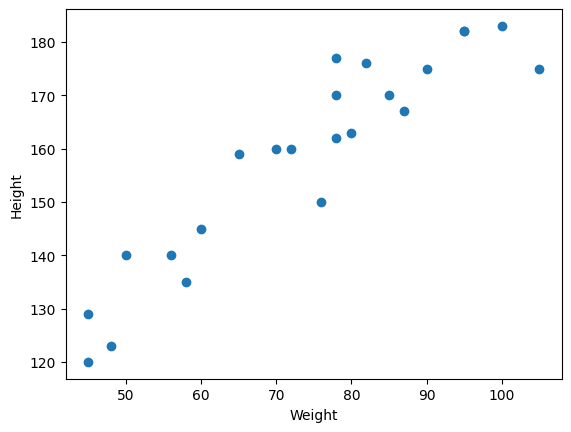

In [51]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [52]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


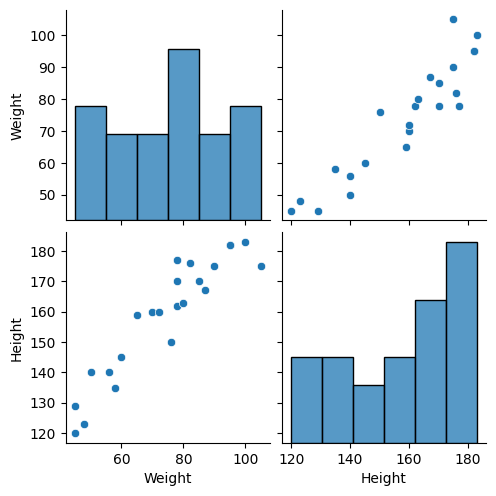

In [53]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)


In [54]:
## Simple Linera Regression
## step 1. Divide our Independent and Dependent Feature

X=df[['Weight']] #Independent Fea should be in -> data frame or 2 dimension
y=df['Height'] #Dependent Fea should be in -> data series or 1 dimension
print(X.info)
print(y.info)


<bound method DataFrame.info of     Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72>
<bound method Series.info of 0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64>


In [55]:
### Step 2
## Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [56]:
X_train.shape

(18, 1)

In [57]:
y_train.shape

(18,)

In [58]:
### Step 3
## Standardization

## height -> cm unit,
## weight -> kg unit,

##so,to compare both we need standardization
# we take each independent feature and apply
# Z_score ==
# mean =0 and standard deviation =1
# Z_score == Xi(indepent feat.) - M(mean) / SD(standard deviation)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
## fit_tranform vs transform (IMP.)
X_train=scaler.fit_transform(X_train) ## Z_score formula is using
X_test=scaler.transform(X_test) ## here if i use fit_transform then again new mean and S.D will be calculated
## Data leakage(IMP) : i did not want my Train data to know any information about test Data  

In [60]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

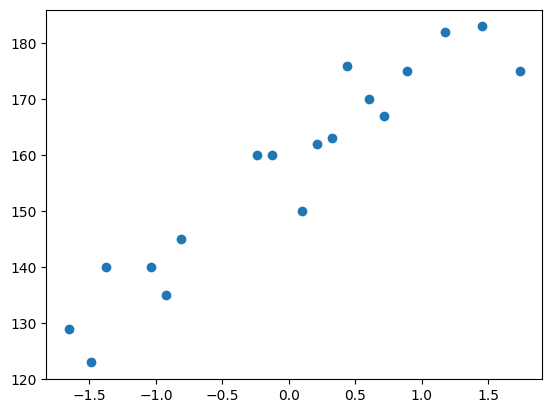

In [61]:
plt.scatter(X_train,y_train)

In [62]:
### Step 4
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [63]:
regressor=LinearRegression()

In [64]:
regressor.fit(X_train,y_train)

LinearRegression()

In [65]:
print("coefficient or slope : ",regressor.coef_)
print("Intercept or Constant : ",regressor.intercept_)
# one unit movement in the weight value that 
# lead to 17.03 unit movement in the height value
# when weight value is zero then at which point it intercept the y-axis
# 157.5 it intercept the y-axis

coefficient or slope :  [17.03440872]
Intercept or Constant :  157.5


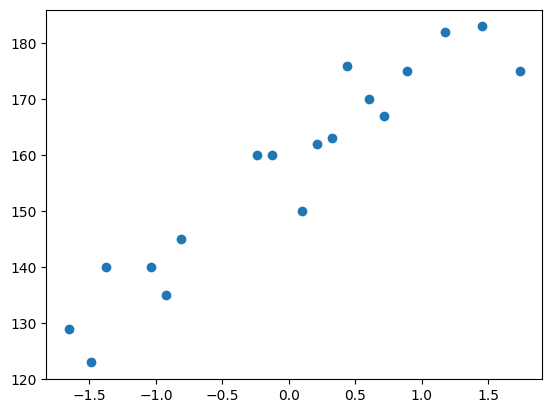

In [67]:
### Step 5
## wrt to training data plot best fit line
plt.scatter(X_train,y_train)


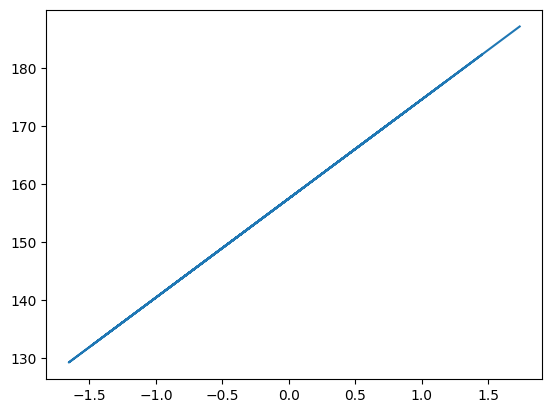

In [68]:
plt.plot(X_train,regressor.predict(X_train))

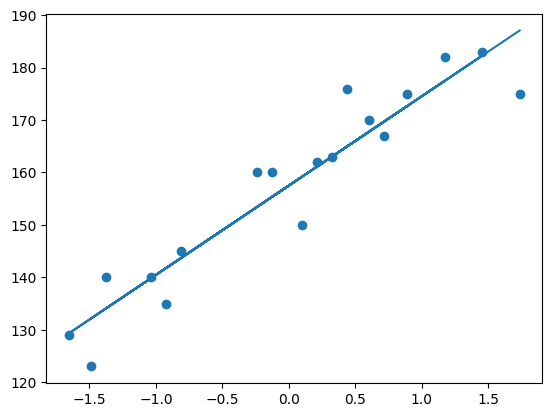

In [69]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

## prediction of train data
predicted height output= intercept +coef_(Weights)

y_pred_train =157.5 + 17.03(X_train)


## prediction of test data
predicted height output= intercept +coef_(Weights)

y_pred_test =157.5 + 17.03(X_test)

In [45]:
## prediction for test data 
y_pred=regressor.predict(X_test)
print(y_pred)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [70]:
print(y_test)

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64


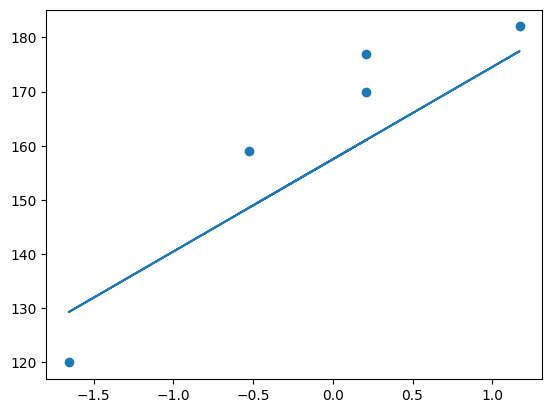

In [71]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))


In [72]:
### Performance Matrics
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [73]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


### R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [74]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.776986986042344


## Adjusted R2 

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [75]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.7026493147231252

In [78]:
## OLS Linear Regression
import statsmodels.api as sm

In [81]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(predictions) 

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [80]:
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                       0.661
Time:                        19:07:02   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/adnanashraf/Documents/ai/code/ml/1_LinearRegression/1_SimpleLR/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
## Prediction for new data or (say as new weight)

regressor.predict([[84]])## this output is wrong 

array([1588.3903324])

In [ ]:
regressor.predict(scaler.transform([[84]]))## This output is correct

/Users/adnanashraf/Documents/ai/code/ml/1_LinearRegression/1_SimpleLR/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([166.86294627])